<a href="https://colab.research.google.com/github/rmgithub123/be_class/blob/main/DBSCAN_marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv')

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.shape

(2240, 29)

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Performing EDA

In [ ]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
data['Income'] = data['Income'].fillna(0)

In [ ]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df = data.drop(['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer'],axis=1)

In [ ]:
df

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,58,635,88,546,172,88,88,3,8,...,7,0,0,0,0,0,0,3,11,1
1,2174,38,11,1,6,2,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,26,426,49,127,111,21,42,1,8,...,4,0,0,0,0,0,0,3,11,0
3,6182,26,11,4,20,10,3,5,2,2,...,6,0,0,0,0,0,0,3,11,0
4,5324,94,173,43,118,46,27,15,5,5,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,709,43,182,42,118,247,2,9,...,5,0,0,0,0,0,0,3,11,0
2236,4001,56,406,0,30,0,0,8,7,8,...,7,0,0,0,1,0,0,3,11,0
2237,7270,91,908,48,217,32,12,24,1,2,...,6,0,1,0,0,0,0,3,11,0
2238,8235,8,428,30,214,80,30,61,2,6,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df_array = df.values

In [ ]:
df_array

array([[5524,   58,  635, ...,    3,   11,    1],
       [2174,   38,   11, ...,    3,   11,    0],
       [4141,   26,  426, ...,    3,   11,    0],
       ...,
       [7270,   91,  908, ...,    3,   11,    0],
       [8235,    8,  428, ...,    3,   11,    0],
       [9405,   40,   84, ...,    3,   11,    1]])

# Applying Standardization to the Dataset

In [ ]:
scale = StandardScaler()

In [ ]:
x = scale.fit_transform(df_array)

In [ ]:
x

array([[-0.0209985 ,  0.30703926,  0.98378127, ...,  0.        ,
         0.        ,  2.38884634],
       [-1.05305783, -0.38366418, -0.87047948, ...,  0.        ,
         0.        , -0.41861211],
       [-0.44706956, -0.79808624,  0.36272278, ...,  0.        ,
         0.        , -0.41861211],
       ...,
       [ 0.51690466,  1.44669994,  1.79502034, ...,  0.        ,
         0.        , -0.41861211],
       [ 0.81419936, -1.41971934,  0.36866592, ...,  0.        ,
         0.        , -0.41861211],
       [ 1.17464994, -0.31459383, -0.65355475, ...,  0.        ,
         0.        ,  2.38884634]])

# Loading the Model

In [ ]:
df.columns

Index(['ID', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
model = DBSCAN(min_samples=5)

In [ ]:
model

DBSCAN()

# Training the Model


In [ ]:
model.fit(x)

DBSCAN()

# Displaying the Labels

In [ ]:
model.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
set(list(model.labels_))

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [ ]:
class_ = pd.DataFrame(model.labels_,columns=['cluster_values'])

In [ ]:
class_

,cluster_values
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
2235,-1
2236,-1
2237,-1
2238,-1


# Merging the cluster_values to the Entire Dataset

In [ ]:
df

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,58,635,88,546,172,88,88,3,8,...,7,0,0,0,0,0,0,3,11,1
1,2174,38,11,1,6,2,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,26,426,49,127,111,21,42,1,8,...,4,0,0,0,0,0,0,3,11,0
3,6182,26,11,4,20,10,3,5,2,2,...,6,0,0,0,0,0,0,3,11,0
4,5324,94,173,43,118,46,27,15,5,5,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,709,43,182,42,118,247,2,9,...,5,0,0,0,0,0,0,3,11,0
2236,4001,56,406,0,30,0,0,8,7,8,...,7,0,0,0,1,0,0,3,11,0
2237,7270,91,908,48,217,32,12,24,1,2,...,6,0,1,0,0,0,0,3,11,0
2238,8235,8,428,30,214,80,30,61,2,6,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
final_df = pd.concat([df,class_],axis=1)

In [ ]:
final_df

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster_values
0,5524,58,635,88,546,172,88,88,3,8,...,0,0,0,0,0,0,3,11,1,-1
1,2174,38,11,1,6,2,1,6,2,1,...,0,0,0,0,0,0,3,11,0,-1
2,4141,26,426,49,127,111,21,42,1,8,...,0,0,0,0,0,0,3,11,0,-1
3,6182,26,11,4,20,10,3,5,2,2,...,0,0,0,0,0,0,3,11,0,-1
4,5324,94,173,43,118,46,27,15,5,5,...,0,0,0,0,0,0,3,11,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,709,43,182,42,118,247,2,9,...,0,0,0,0,0,0,3,11,0,-1
2236,4001,56,406,0,30,0,0,8,7,8,...,0,0,0,1,0,0,3,11,0,-1
2237,7270,91,908,48,217,32,12,24,1,2,...,0,1,0,0,0,0,3,11,0,-1
2238,8235,8,428,30,214,80,30,61,2,6,...,0,0,0,0,0,0,3,11,0,-1


# Generating Inference

In [ ]:
final_df['cluster_values'].unique()

array([-1,  0,  1,  5, 12,  2,  3,  4,  6, 11, 10,  8,  7,  9])

In [ ]:
final_df[final_df['cluster_values']==-1]

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster_values
0,5524,58,635,88,546,172,88,88,3,8,...,0,0,0,0,0,0,3,11,1,-1
1,2174,38,11,1,6,2,1,6,2,1,...,0,0,0,0,0,0,3,11,0,-1
2,4141,26,426,49,127,111,21,42,1,8,...,0,0,0,0,0,0,3,11,0,-1
3,6182,26,11,4,20,10,3,5,2,2,...,0,0,0,0,0,0,3,11,0,-1
4,5324,94,173,43,118,46,27,15,5,5,...,0,0,0,0,0,0,3,11,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,709,43,182,42,118,247,2,9,...,0,0,0,0,0,0,3,11,0,-1
2236,4001,56,406,0,30,0,0,8,7,8,...,0,0,0,1,0,0,3,11,0,-1
2237,7270,91,908,48,217,32,12,24,1,2,...,0,1,0,0,0,0,3,11,0,-1
2238,8235,8,428,30,214,80,30,61,2,6,...,0,0,0,0,0,0,3,11,0,-1


In [ ]:
final_df[final_df['cluster_values']==12]

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster_values
157,9283,49,8,1,7,2,0,0,1,0,...,0,0,0,0,0,0,3,11,0,12
1128,8977,51,1,3,4,2,3,11,1,0,...,0,0,0,0,0,0,3,11,0,12
1683,7788,53,6,0,3,0,0,1,1,0,...,0,0,0,0,0,0,3,11,0,12
2089,7901,39,9,1,5,2,1,4,1,0,...,0,0,0,0,0,0,3,11,0,12
2232,8080,50,5,1,6,3,4,3,1,0,...,0,0,0,0,0,0,3,11,0,12


# Visualizing the Result

In [ ]:
final_df


,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster_values
0,5524,58,635,88,546,172,88,88,3,8,...,0,0,0,0,0,0,3,11,1,-1
1,2174,38,11,1,6,2,1,6,2,1,...,0,0,0,0,0,0,3,11,0,-1
2,4141,26,426,49,127,111,21,42,1,8,...,0,0,0,0,0,0,3,11,0,-1
3,6182,26,11,4,20,10,3,5,2,2,...,0,0,0,0,0,0,3,11,0,-1
4,5324,94,173,43,118,46,27,15,5,5,...,0,0,0,0,0,0,3,11,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,709,43,182,42,118,247,2,9,...,0,0,0,0,0,0,3,11,0,-1
2236,4001,56,406,0,30,0,0,8,7,8,...,0,0,0,1,0,0,3,11,0,-1
2237,7270,91,908,48,217,32,12,24,1,2,...,0,1,0,0,0,0,3,11,0,-1
2238,8235,8,428,30,214,80,30,61,2,6,...,0,0,0,0,0,0,3,11,0,-1


In [ ]:
input_x = final_df.iloc[:,:-1].values

In [ ]:
output_y = final_df.iloc[:,-1].values

In [ ]:
input_x

array([[5524,   58,  635, ...,    3,   11,    1],
       [2174,   38,   11, ...,    3,   11,    0],
       [4141,   26,  426, ...,    3,   11,    0],
       ...,
       [7270,   91,  908, ...,    3,   11,    0],
       [8235,    8,  428, ...,    3,   11,    0],
       [9405,   40,   84, ...,    3,   11,    1]])

In [ ]:
output_y

array([-1, -1, -1, ..., -1, -1, -1])

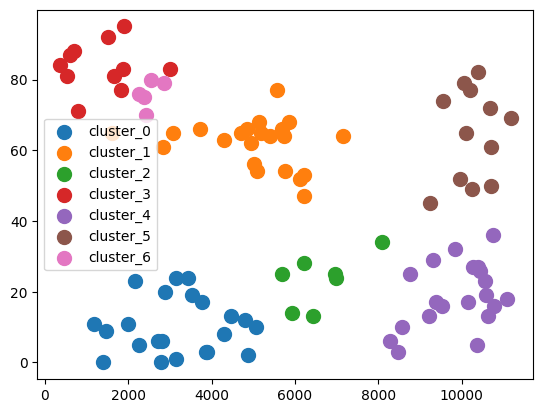

In [ ]:
plt.scatter(input_x[output_y==0,0],input_x[output_y==0,1],s=100, label='cluster_0')
plt.scatter(input_x[output_y==1,0],input_x[output_y==1,1],s=100, label='cluster_1')
plt.scatter(input_x[output_y==2,0],input_x[output_y==2,1],s=100, label='cluster_2')
plt.scatter(input_x[output_y==3,0],input_x[output_y==3,1],s=100, label='cluster_3')
plt.scatter(input_x[output_y==4,0],input_x[output_y==4,1],s=100, label='cluster_4')
plt.scatter(input_x[output_y==5,0],input_x[output_y==5,1],s=100, label='cluster_5')
plt.scatter(input_x[output_y==6,0],input_x[output_y==6,1],s=100, label='cluster_6')
plt.legend()
plt.show()